In [132]:
# 모듈 로드
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings

In [133]:
# 경고무시
warnings.filterwarnings(action='ignore')

In [134]:
# 데이터 생성
perch_length =	np.array([8.4,	13.7,	15.0,	16.2,	17.4,	18.0,	18.7,	19.0,	19.6,	20.0,	
21.0,	21.0,	21.0,	21.3,	22.0,	22.0,	22.0,	22.0,	22.0,	22.5,	
22.5,	22.7,	23.0,	23.5,	24.0,	24.0,	24.6,	25.0,	25.6,	26.5,	
27.3,	27.5,	27.5,	27.5,	28.0,	28.7,	30.0,	32.8,	34.5,	35.0,	
36.5,	36.0,	37.0,	37.0,	39.0,	39.0,	39.0,	40.0,	40.0,	40.0,	
40.0,	42.0,	43.0,	43.0,	43.5,	44.0])

perch_weight =	np.array([5.9,	32.0,	40.0,	51.5,	70.0,	100.0,	78.0,	80.0,	85.0,	85.0,	
110.0,	115.0,	125.0,	130.0,	120.0,	120.0,	130.0,	135.0,	110.0,	130.0,
150.0,	145.0,	150.0,	170.0,	225.0,	145.0,	188.0,	180.0,	197.0,	218.0,	
300.0,	260.0,	265.0,	250.0,	250.0,	300.0,	320.0,	514.0,	556.0,	840.0,	
685.0,	700.0,	700.0,	690.0,	900.0,	650.0,	820.0,	850.0,	900.0,	1015.0,
820.0,	1100.0,	1000.0,	1100.0,	1000.0,	1000.0])

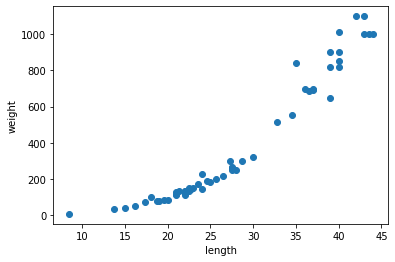

In [135]:
# 산점도 확인
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [136]:
# 훈련/테스트 데이터 분리
train_input,test_input,train_target,test_target=train_test_split(perch_length,perch_weight,random_state=42)
print(train_input.shape,test_input.shape)

print(train_input)
print(test_input)

print(train_target.shape,test_target.shape)

print(train_target)
print(test_target)

(42,) (14,)
[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
(42,) (14,)
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [137]:
# 2차원 배열로 변경
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

print(train_input.shape,test_input.shape)

(42, 1) (14, 1)


##### reshape()함수 예제

In [138]:
train_input.reshape(6,-1)

array([[19.6, 22. , 18.7, 17.4, 36. , 25. , 40. ],
       [39. , 43. , 22. , 20. , 22. , 24. , 27.5],
       [43. , 40. , 24. , 21. , 27.5, 40. , 32.8],
       [26.5, 36.5, 13.7, 22.7, 15. , 37. , 35. ],
       [28.7, 23.5, 39. , 21. , 23. , 22. , 44. ],
       [22.5, 19. , 37. , 22. , 25.6, 42. , 34.5]])

In [139]:
# 배열로 변환
train_input.reshape(21,2)
# train_input.reshape(-1,2)로 해도 동일한 결과가 나옴

array([[19.6, 22. ],
       [18.7, 17.4],
       [36. , 25. ],
       [40. , 39. ],
       [43. , 22. ],
       [20. , 22. ],
       [24. , 27.5],
       [43. , 40. ],
       [24. , 21. ],
       [27.5, 40. ],
       [32.8, 26.5],
       [36.5, 13.7],
       [22.7, 15. ],
       [37. , 35. ],
       [28.7, 23.5],
       [39. , 21. ],
       [23. , 22. ],
       [44. , 22.5],
       [19. , 37. ],
       [22. , 25.6],
       [42. , 34.5]])

- 행을 정하고 열에 -1을 넣든지 열을 정하고 행에 -1을 넣든지  
  정해진 열과 행열 맞추어서 자동으로 행과 열이 지정됨
- 이 예제들로 인해 밑에 코드가 오류 날수 있으니 주의 하자!!!

## knn이웃 회귀

In [140]:
# knn이웃 회귀 알고리즘
knr=KNeighborsRegressor().fit(train_input,train_target) # knn회귀 객체 생성

print(knr.score(test_input,test_target)) # 결정계수

0.992809406101064


In [141]:
# 테스트 세트에 대한 예측값
test_prediction=knr.predict(test_input)
test_prediction

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [142]:
# 테스트 세트에 대한 평균 절대 오차 계산
mae=mean_absolute_error(test_target,test_prediction)
print(mae)

19.157142857142862


- 이 결과의 뜻은 19.157142857142862g 정도의 오차가 발생한다는 것을 의미

In [143]:
# 훈련 세트를 사용하여 결정계수 계산
print(knr.score(train_input,train_target))

0.9698823289099254


In [144]:
# 테스트 세트를 사용하여 결정계수 계산
print(knr.score(test_input,test_target)) # 위의 값과 동일하게 나옴

0.992809406101064


In [145]:
# 이웃수를 줄여보자
knr.n_neighbors=3
knr.fit(train_input,train_target)

print(f"훈련 데이터로 모델의 정확도 점수 계산: {knr.score(train_input,train_target)}")
print(f"테스트 데이터로 모델의 정확도 점수 계산: {knr.score(test_input,test_target)}")

훈련 데이터로 모델의 정확도 점수 계산: 0.9804899950518966
테스트 데이터로 모델의 정확도 점수 계산: 0.9746459963987609


- 이웃개수를 줄이는 것으로 테스트의 정확도는 떨어졌지만 훈련데이터의 정확도는 높아짐

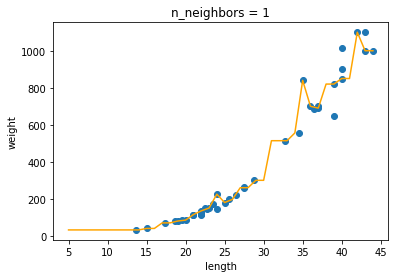

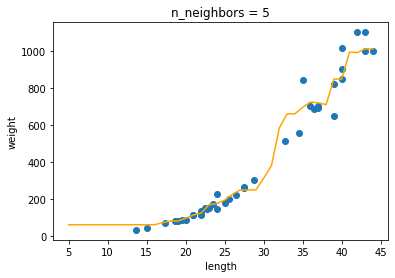

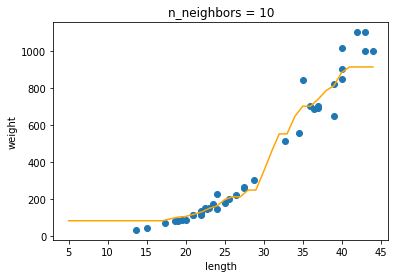

In [146]:
# 이웃수를 1,5,10으로 변경
knr = KNeighborsRegressor() # knn회귀 객체 생성

x = np.arange(5, 45).reshape(40, -1) # 농어의 길이를 5~45로 설정

for n in [1,5,10]:
    knr.n_neighbors=n # 이웃 개수
    knr.fit(train_input, train_target) # 모델 훈련
    prediction = knr.predict(x) # 예측값
    plt.scatter(train_input, train_target, label='train	set') # 산점도
    plt.plot(x,	prediction,	label='prediction',	color='orange') # 이웃수가 변경될 때마다 prediction값이 변경됨
    plt.title(f'n_neighbors = {n}')
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

In [147]:
# 새로운 데이터로 예측
knr=KNeighborsRegressor(n_neighbors=3) # knn회귀 이웃수는 3으로 설정
knr.fit(train_input,train_target) # 모델 훈련

print(f"50cm: {knr.predict([[50]])}") # 길이가 50cm일 때 무게 예측
print(f"100cm: {knr.predict([[100]])}") # 길이가 100cm일 때 무게 예측

50cm: [1033.33333333]
100cm: [1033.33333333]


In [148]:
# 50cm 농어의 이웃을 구함
distances_50, indexes_50 = knr.kneighbors([[50]])
print(f"무게가 50cm의 주변 3개 이웃 중에 거리는?? {distances_50}")
print(f"무게가 50cm의 주변 3개 이웃 중에 인덱스는?? {indexes_50}")

무게가 50cm의 주변 3개 이웃 중에 거리는?? [[6. 7. 7.]]
무게가 50cm의 주변 3개 이웃 중에 인덱스는?? [[34  8 14]]


In [149]:
# 100cm 농어의 이웃을 구함
distances_100, indexes_100 = knr.kneighbors([[100]])
print(f"무게가 100cm의 주변 3개 이웃 중에 거리는?? {distances_100}")
print(f"무게가 100cm의 주변 3개 이웃 중에 인덱스는?? {indexes_100}")

무게가 100cm의 주변 3개 이웃 중에 거리는?? [[56. 57. 57.]]
무게가 100cm의 주변 3개 이웃 중에 인덱스는?? [[34  8 14]]


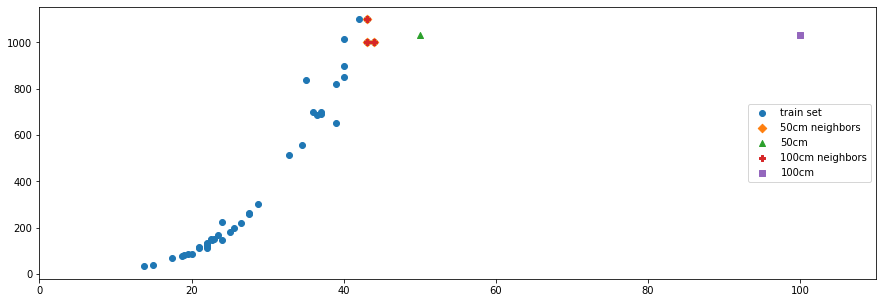

In [150]:
# 산점도
plt.figure(figsize=(15,5))
plt.scatter(train_input, train_target,label='train set')
plt.scatter(train_input[indexes_50],train_target[indexes_50], marker='D', label='50cm neighbors')
plt.scatter(50,	1033,	marker='^',	label='50cm')
plt.scatter(train_input[indexes_100],train_target[indexes_100], marker='P',	label='100cm neighbors')
plt.scatter(100, 1033, marker='s', label='100cm')
plt.xlim(0,	110)
plt.legend(loc=7)
plt.show()

- 50cm와 100cm는 점이 겹쳐져 있음

In [151]:
# 훈련데이터에서 이웃 데이터의 인덱스 확인
print(f"50cm neighbors indexes {indexes_50}")
print(f"100cm neighbors indexes {indexes_100}")

50cm neighbors indexes [[34  8 14]]
100cm neighbors indexes [[34  8 14]]


- 50cm와 100cm의 인덱스는 동일함

In [152]:
# 이웃데이터의 무게 평균 계산
print(np.mean(train_target[indexes_50]))
print(np.mean(train_target[indexes_100]))

1033.3333333333333
1033.3333333333333


- 이웃이 동일하니 평균의 거리도 동일함
- 50cm와 100cm의 예측 무게가 달라야 하는데 동일하게 나오므로 문제점 발생

## 선형회귀

In [153]:
# 회귀식을 그리기 위한 회귀계수와 절편 찾기
lr=LinearRegression() # knn회귀 객체 생성
lr.fit(train_input,train_target)

print(f"50cm: {lr.predict([[50]])}")
print(f"회귀계수는 {lr.coef_}, 절편은 {lr.intercept_}")

50cm: [1241.83860323]
회귀계수는 [39.01714496], 절편은 -709.0186449535474


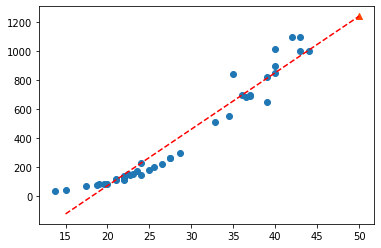

In [154]:
# 산점도에 회귀식 추가
plt.scatter(train_input,train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_],color='red',linestyle='--')
plt.scatter(50,1241.8,marker='^',color='orangered')
plt.show()

- plt.plot으로 x축과 y축의 최대값/최소값을 잇는 선이 그려짐
- 그런데 여기서, 빨간선인 예측선이 18이하 일 때는 무게가 마이너스로 예측해서 문제점이 발생

In [155]:
# 마이너스로 나오는 예측값
# 무게는 0이하로 나올수가 없음
print(lr.predict([[14]]))
print(lr.predict([[15]]))
print(lr.predict([[16]]))
print(lr.predict([[17]]))
print(lr.predict([[18]]))
print(lr.predict([[19]]))
print(lr.predict([[20]]))
print(lr.predict([[50]]))
print(lr.predict([[100]]))

[-162.77861546]
[-123.7614705]
[-84.74432554]
[-45.72718057]
[-6.71003561]
[32.30710936]
[71.32425432]
[1241.83860323]
[3192.69585141]


- 여기서 문제점은 15~18까지의 길이에서는 예측값인 무게가 0이하라는 것에 있음

## 다항회귀

In [156]:
# 다항회귀식 준비
train_poly=np.column_stack((train_input**2,train_input))
test_poly=np.column_stack((test_input**2,test_input))

print(train_poly[0:5])
print(train_poly.shape,test_poly.shape)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
(42, 2) (14, 2)


In [157]:
# 선형회귀 모델을 이용하여 다항회귀를 하자
lr=LinearRegression()
lr.fit(train_poly,train_target)

print(lr.predict([[50**2,50]]))
print(lr.coef_,lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


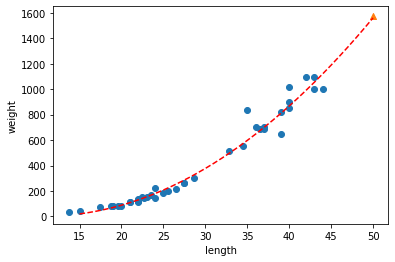

In [158]:
# 다항 회귀식 그래프 그리기
point=np.arange(15,51) # 길이가 15~50까지인 데이터를 가지고 무게 예측하기 
plt.scatter(train_input,train_target)
plt.plot(point,1.01*point**2-21.6*point+116.05,color='red',linestyle='--')
plt.scatter([50],[1574],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 다중 회귀

In [159]:
# 데이터 준비
df=pd.read_csv('https://bit.ly/perch_csv')
perch_full=df.to_numpy()

print(perch_full[:5])
print(perch_full.shape)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]
(56, 3)


In [160]:
# 훈련/테스트 데이터 분리
train_input,test_input,train_target,test_target=train_test_split(perch_full,perch_weight,random_state=42)

print(train_input)
print(train_target)

print(train_input.shape)
print(train_target.shape)

[[19.6   5.14  3.04]
 [22.    5.88  3.52]
 [18.7   5.2   3.12]
 [17.4   4.59  2.94]
 [36.   10.61  6.74]
 [25.    6.44  3.68]
 [40.   11.93  7.11]
 [39.   12.43  7.35]
 [43.   11.93  7.28]
 [22.    5.64  3.52]
 [20.    5.08  2.77]
 [22.    6.11  3.52]
 [24.    7.29  3.72]
 [27.5   7.17  4.34]
 [43.   12.51  7.42]
 [40.   11.73  7.22]
 [24.    6.38  3.82]
 [21.    5.92  3.31]
 [27.5   7.05  4.34]
 [40.   12.38  7.46]
 [32.8  10.03  6.02]
 [26.5   7.17  4.14]
 [36.5  10.88  6.86]
 [13.7   3.53  2.  ]
 [22.7   5.95  3.63]
 [15.    3.82  2.43]
 [37.   10.57  6.37]
 [35.   11.49  7.8 ]
 [28.7   7.59  4.64]
 [23.5   6.28  3.72]
 [39.   11.14  6.  ]
 [21.    5.69  3.56]
 [23.    5.22  3.63]
 [22.    5.52  4.  ]
 [44.   12.49  7.6 ]
 [22.5   6.79  3.62]
 [19.    5.64  3.05]
 [37.   10.84  6.26]
 [22.    6.11  3.41]
 [25.6   6.56  4.24]
 [42.   12.8   6.87]
 [34.5  10.26  6.39]]
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1

- 56행을 75%는 훈련, 25%는 테스트로 하면 훈련은 42행, 테스트는 14행이 생김

In [161]:
# 절편이 있는 경우 예제
poly=PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [162]:
# 절편이 없는 경우 예제
poly=PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


- PolynomialFeatures()함수로는 다항의 특성을 만들 수 있음
- transform()함수로는 특성 조합을 실제 데이터로 변환 => 숫자데이터
- get_feature_names()함수로는 각 특성의 조합을 알려줌 => 'x0','x1',...'x0 x1','x1^2' 이런 식으로 알려줌

In [163]:
# 훈련세트로 다중특성 만들기
poly=PolynomialFeatures(include_bias=False) # 절편 삭제
poly.fit(train_input) 

train_poly=poly.transform(train_input) # 다중특성을 가진 실제 데이터
print(train_poly[0:3])
print(train_poly.shape)

test_poly=poly.transform(test_input) # 다중특성을 가진 실제 데이터
print(test_poly[0:3])
print(test_poly.shape)

print(poly.get_feature_names()) # ()를 빼먹지말고 꼭 쓰지

[[ 19.6      5.14     3.04   384.16   100.744   59.584   26.4196  15.6256
    9.2416]
 [ 22.       5.88     3.52   484.     129.36    77.44    34.5744  20.6976
   12.3904]
 [ 18.7      5.2      3.12   349.69    97.24    58.344   27.04    16.224
    9.7344]]
(42, 9)
[[  8.4      2.11     1.41    70.56    17.724   11.844    4.4521   2.9751
    1.9881]
 [ 18.       5.22     3.32   324.      93.96    59.76    27.2484  17.3304
   11.0224]
 [ 27.5      7.28     4.57   756.25   200.2    125.675   52.9984  33.2696
   20.8849]]
(14, 9)
['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']


In [164]:
train_poly

array([[  19.6   ,    5.14  ,    3.04  ,  384.16  ,  100.744 ,   59.584 ,
          26.4196,   15.6256,    9.2416],
       [  22.    ,    5.88  ,    3.52  ,  484.    ,  129.36  ,   77.44  ,
          34.5744,   20.6976,   12.3904],
       [  18.7   ,    5.2   ,    3.12  ,  349.69  ,   97.24  ,   58.344 ,
          27.04  ,   16.224 ,    9.7344],
       [  17.4   ,    4.59  ,    2.94  ,  302.76  ,   79.866 ,   51.156 ,
          21.0681,   13.4946,    8.6436],
       [  36.    ,   10.61  ,    6.74  , 1296.    ,  381.96  ,  242.64  ,
         112.5721,   71.5114,   45.4276],
       [  25.    ,    6.44  ,    3.68  ,  625.    ,  161.    ,   92.    ,
          41.4736,   23.6992,   13.5424],
       [  40.    ,   11.93  ,    7.11  , 1600.    ,  477.2   ,  284.4   ,
         142.3249,   84.8223,   50.5521],
       [  39.    ,   12.43  ,    7.35  , 1521.    ,  484.77  ,  286.65  ,
         154.5049,   91.3605,   54.0225],
       [  43.    ,   11.93  ,    7.28  , 1849.    ,  512.99  ,  313.04  

In [165]:
# 다중 회귀 모델 훈련
lr=LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9903183436982126
0.9714559911594125


- 모델 훈련할 때 쓰는 train_poly는 9개의 특성을 가진 데이터임

In [166]:
# 다중회귀 예제 2
poly=PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly_tr=poly.transform(train_input)
test_poly_tr=poly.transform(test_input)

print(train_poly_tr.shape)

(42, 55)


- 차수는 5로 5차 방정식을 의미하고 절편은 제거
- 55개의 특성을 가진 데이터 생성

In [167]:
# 다중회귀 모델 훈련 및 점수 계산
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9903183436982126
0.9714559911594125


# 규제

In [168]:
train_poly.shape

(42, 9)

In [169]:
# 클래스를 사용한 표준화
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_poly_tr)
train_scaled=ss.transform(train_poly_tr)
test_scaled=ss.transform(test_poly_tr)

In [170]:
# 릿지 회귀
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))

0.9896101671037343


In [171]:
# 알파값을 작게하거나 크게 해보기
# alpha=1이 기본값
ridge=Ridge(alpha=2)
ridge.fit(train_scaled,train_target)
print(f"알파값이 2일 때 평가 점수 : {ridge.score(train_scaled,train_target)}")

ridge=Ridge(alpha=0.5)
ridge.fit(train_scaled,train_target)
print(f"알파값이 0.5일 때 평가 점수 : {ridge.score(train_scaled,train_target)}")

# 알파값이 커질 때 규제가 강해져서 계수를 줄이는 것이 더 높은 평가 점수를 받을 수 있음

알파값이 2일 때 평가 점수 : 0.9894516227693472
알파값이 0.5일 때 평가 점수 : 0.9897959087322828


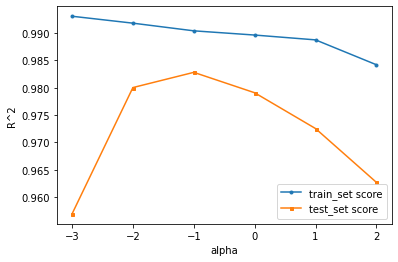

In [172]:
# 적절한 알파값 찾기
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]

for alpha in alpha_list:
    ridge=Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score,label='train_set score',marker='o',markersize=3)
plt.plot(np.log10(alpha_list),test_score,label='test_set score',marker='s',markersize=3)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

- train과 test가 가장 가까운 알파가 로그되어진 값 -1, 즉 alpha=0,1일 때 가장 적합 

In [173]:
# 알파가 0.1일 때 점수 확인
ridge=Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)

print(f"train의 점수: {ridge.score(train_scaled,train_target)}")
print(f"test의 점수: {ridge.score(test_scaled,test_target)}")

train의 점수: 0.9903815817570367
test의 점수: 0.9827976465386928


In [174]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

lasso=Lasso() # 기본 alpha는 1
lasso.fit(train_scaled,train_target)

print(f"라쏘의 train 평가 점수 : {lasso.score(train_scaled,train_target)}")
print(f"라쏘의 test 평가 점수 : {lasso.score(test_scaled,test_target)}")

라쏘의 train 평가 점수 : 0.989789897208096
라쏘의 test 평가 점수 : 0.9800593698421883


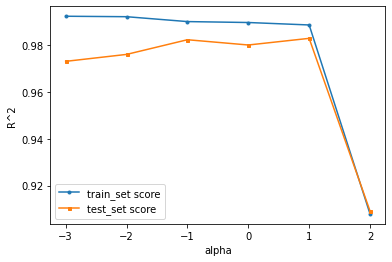

In [176]:
# 라쏘 회귀의 적절한 alpha값 찾기
train_score=[]
test_score=[]

alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    lasso=Lasso(alpha=alpha,max_iter=10000).fit(train_scaled,train_target)
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score,label='train_set score',marker='o',markersize=3)
plt.plot(np.log10(alpha_list),test_score,label='test_set score',marker='s',markersize=3)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

# 로그된 값이 1일때 가장 적합하므로 alpha=10일 때 가장 적절함

In [177]:
# alpha가 10일 때 평가점수 확인
lasso=Lasso(alpha=10)
lasso.fit(train_scaled,train_target)

print(f"라쏘 train 평가 점수 : {lasso.score(train_scaled,train_target)}")
print(f"라쏘 test 평가 점수 : {lasso.score(test_scaled,test_target)}")

라쏘 train 평가 점수 : 0.9888067471131867
라쏘 test 평가 점수 : 0.9824470598706695


In [ ]:
from sklearn.preprocessing import MinMaxScaler